# Sentiment Analysis

Dataset = reviews.csv, columns=(headline, reviewbody, ratingvalue), shape = 325,3

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('reviews.csv')
df = data.copy() #creating a copy of original dataset and using it for the process

In [3]:
df


,headline,reviewBody,ratingValue
0,Super light and efficient laptop,Super light and efficient laptop. Crisp & cle...,5.0
1,NEW laptop is great,so far I am loving the new look and the feel o...,5.0
2,Lightweight powerhouse.,Great build quality \ excellent screen \ very ...,5.0
3,Great Laptop for Work,Excellent laptop for work. Processor was able ...,5.0
4,Practical Solid Laptop,"So far so good, I like it has an HDMI, USB-C &...",5.0
...,...,...,...
320,Dell Latitude 7440 Ultralight Review: A solid ...,Dell's Latitude 7440 Ultralight 2-in-1 impress...,NaN
321,Dell Latitude 7440 Ultralight Review: A solid ...,Dell's Latitude 7440 Ultralight 2-in-1 impress...,NaN
322,Dell Latitude 7440 Ultralight Review: A solid ...,Dell's Latitude 7440 Ultralight 2-in-1 impress...,NaN
323,Dell Latitude 7440 Ultralight Review: A solid ...,Dell's Latitude 7440 Ultralight 2-in-1 impress...,NaN


In [4]:
df.shape

(325, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   headline     325 non-null    object 
 1   reviewBody   325 non-null    object 
 2   ratingValue  319 non-null    float64
dtypes: float64(1), object(2)
memory usage: 7.7+ KB


In [6]:
df.isnull().sum() #there are 6 null values in the ratingValue column

headline       0
reviewBody     0
ratingValue    6
dtype: int64

In [7]:
df.duplicated().sum() #there are 19 duplicate rows in the dataset

19

In [8]:
df.drop_duplicates(inplace=True,keep='first') #dropping the duplicate rows keeping the first row

In [9]:
df.isnull().sum()

headline       0
reviewBody     0
ratingValue    1
dtype: int64

In [10]:
df[df['ratingValue'].isnull()]

,headline,reviewBody,ratingValue
319,Dell Latitude 7440 Ultralight Review: A solid ...,Dell's Latitude 7440 Ultralight 2-in-1 impress...,NaN


In [11]:
df.dropna(inplace=True) #dropping the null values

In [12]:
df.shape

(305, 3)

ratingValue
5.0    196
4.0     64
3.0     18
1.0     17
2.0     10
Name: count, dtype: int64


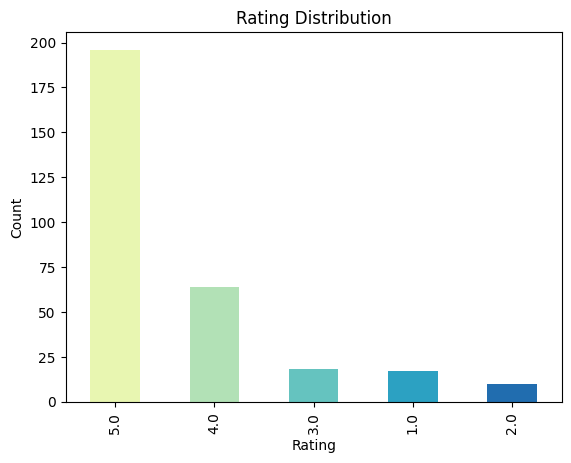

In [13]:
print(df['ratingValue'].value_counts())
df['ratingValue'].value_counts().plot(kind='bar',color = sns.color_palette('YlGnBu')) #bar graph to check the distribution of the values
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating Distribution')
plt.show()

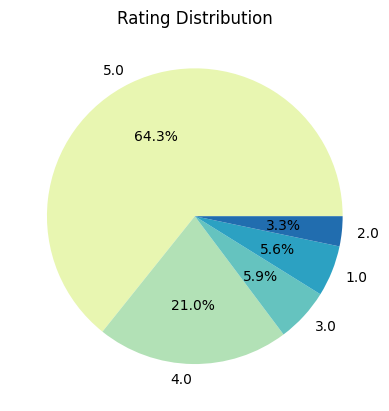

In [14]:
pallete_color = sns.color_palette('YlGnBu')
plt.pie(df['ratingValue'].value_counts(),labels=df['ratingValue'].value_counts().index,autopct='%1.1f%%',colors=pallete_color) #pie chart to check the distribution of the ratingvale values
plt.title('Rating Distribution')
plt.show()

In [15]:
#creating a new column pos_or_neg (1,0)
#sentiment 1 = Positive(5.0,4.0,3.0) , 0 = Negative(2.0,1.0)
df['pos_or_neg'] = df['ratingValue'].apply(lambda x: 1 if x in [5.0,4.0,3.0] else 0)


In [16]:
df

,headline,reviewBody,ratingValue,pos_or_neg
0,Super light and efficient laptop,Super light and efficient laptop. Crisp & cle...,5.0,1
1,NEW laptop is great,so far I am loving the new look and the feel o...,5.0,1
2,Lightweight powerhouse.,Great build quality \ excellent screen \ very ...,5.0,1
3,Great Laptop for Work,Excellent laptop for work. Processor was able ...,5.0,1
4,Practical Solid Laptop,"So far so good, I like it has an HDMI, USB-C &...",5.0,1
...,...,...,...,...
300,Faulty motherboard,Dell sent me a laptop with a faulty motherboard,1.0,0
301,Dead on arrival,"Laptop dead on arrival, still waiting on a rep...",1.0,0
302,Bad Quality,"Bad Quality, overheating, and keyboard/trackpa...",1.0,0
303,Hassles with installation of Win 11,Laptop did not come with the required security...,1.0,0


In [17]:
df['pos_or_neg'].value_counts() #valuecounts for positive = 278 and negative = 28

pos_or_neg
1    278
0     27
Name: count, dtype: int64

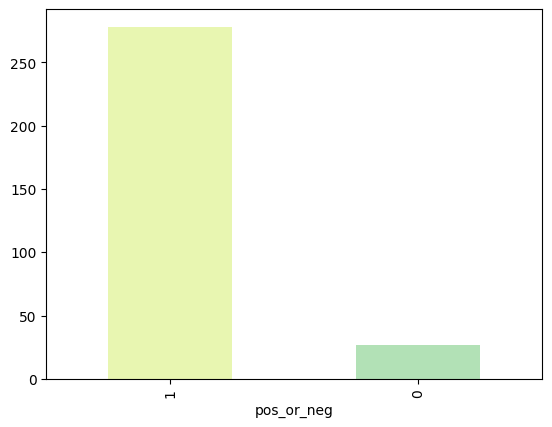

In [18]:
df['pos_or_neg'].value_counts().plot(kind='bar',color=pallete_color) #bargraph for positive and negative
plt.show()

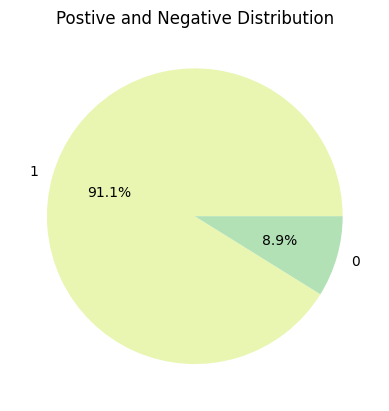

In [19]:
#pie chart for positive and negative with percentage distribution
plt.pie(df['pos_or_neg'].value_counts(),labels=df['pos_or_neg'].value_counts().index,autopct='%1.1f%%',colors=pallete_color)
plt.title('Postive and Negative Distribution')
plt.show()

In [20]:
df['Headline_ReviewBody'] = df['headline'] + ' ' + df['reviewBody'] #joining both the columns headline and reviewBody as one for futher analysis

In [21]:
df

,headline,reviewBody,ratingValue,pos_or_neg,Headline_ReviewBody
0,Super light and efficient laptop,Super light and efficient laptop. Crisp & cle...,5.0,1,Super light and efficient laptop Super light a...
1,NEW laptop is great,so far I am loving the new look and the feel o...,5.0,1,NEW laptop is great so far I am loving the new...
2,Lightweight powerhouse.,Great build quality \ excellent screen \ very ...,5.0,1,Lightweight powerhouse. Great build quality \ ...
3,Great Laptop for Work,Excellent laptop for work. Processor was able ...,5.0,1,Great Laptop for Work Excellent laptop for wor...
4,Practical Solid Laptop,"So far so good, I like it has an HDMI, USB-C &...",5.0,1,"Practical Solid Laptop So far so good, I like ..."
...,...,...,...,...,...
300,Faulty motherboard,Dell sent me a laptop with a faulty motherboard,1.0,0,Faulty motherboard Dell sent me a laptop with ...
301,Dead on arrival,"Laptop dead on arrival, still waiting on a rep...",1.0,0,"Dead on arrival Laptop dead on arrival, still ..."
302,Bad Quality,"Bad Quality, overheating, and keyboard/trackpa...",1.0,0,"Bad Quality Bad Quality, overheating, and keyb..."
303,Hassles with installation of Win 11,Laptop did not come with the required security...,1.0,0,Hassles with installation of Win 11 Laptop did...


In [37]:
#importing/dowloading required libraries
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
import re
from nltk.tokenize import punkt
import spacy
#nlp = spacy.load("en")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [46]:
#creating a function that gives clean_text after preprocessing
def clean_text(x: str):
  text = x.lower()   #converts it to lower
  text = re.sub(r'[^a-zA-Z]+',' ',text).strip() #regular expression and substiting the values with space ' ' and strips it
  #doc = nlp(text)
  #text = ' '.join([token.lemma_ for token in text if not token.is_digit])
  text = ' '.join([stemmer.stem(word) for word in word_tokenize(text)]) #stemming the string
  return text

In [47]:
#checking the clean_text function with a random words
clean_text("Punctuation marks  se the 😱 in English grammar * are represent#ed by sy$mbols. Examples of \"different punctuation marks include: :,\"full stops (.), \"commas (,), question marks (?), exclamation marks (!), colons (:), semicolons (;), apostrophes (') and speech marks (\",\").")

'punctuat mark se the in english grammar are repres ed by sy mbol exampl of differ punctuat mark includ full stop comma question mark exclam mark colon semicolon apostroph and speech mark'

In [48]:
df

,headline,reviewBody,ratingValue,pos_or_neg,Headline_ReviewBody
0,Super light and efficient laptop,Super light and efficient laptop. Crisp & cle...,5.0,1,Super light and efficient laptop Super light a...
1,NEW laptop is great,so far I am loving the new look and the feel o...,5.0,1,NEW laptop is great so far I am loving the new...
2,Lightweight powerhouse.,Great build quality \ excellent screen \ very ...,5.0,1,Lightweight powerhouse. Great build quality \ ...
3,Great Laptop for Work,Excellent laptop for work. Processor was able ...,5.0,1,Great Laptop for Work Excellent laptop for wor...
4,Practical Solid Laptop,"So far so good, I like it has an HDMI, USB-C &...",5.0,1,"Practical Solid Laptop So far so good, I like ..."
...,...,...,...,...,...
300,Faulty motherboard,Dell sent me a laptop with a faulty motherboard,1.0,0,Faulty motherboard Dell sent me a laptop with ...
301,Dead on arrival,"Laptop dead on arrival, still waiting on a rep...",1.0,0,"Dead on arrival Laptop dead on arrival, still ..."
302,Bad Quality,"Bad Quality, overheating, and keyboard/trackpa...",1.0,0,"Bad Quality Bad Quality, overheating, and keyb..."
303,Hassles with installation of Win 11,Laptop did not come with the required security...,1.0,0,Hassles with installation of Win 11 Laptop did...


In [49]:
df['cleaned_headline_reviewbody'] = df['Headline_ReviewBody'].apply(clean_text) #creating a new column and applying the above function to it

In [50]:
df

,headline,reviewBody,ratingValue,pos_or_neg,Headline_ReviewBody,cleaned_headline_reviewbody
0,Super light and efficient laptop,Super light and efficient laptop. Crisp & cle...,5.0,1,Super light and efficient laptop Super light a...,super light and effici laptop super light and ...
1,NEW laptop is great,so far I am loving the new look and the feel o...,5.0,1,NEW laptop is great so far I am loving the new...,new laptop is great so far i am love the new l...
2,Lightweight powerhouse.,Great build quality \ excellent screen \ very ...,5.0,1,Lightweight powerhouse. Great build quality \ ...,lightweight powerhous great build qualiti exce...
3,Great Laptop for Work,Excellent laptop for work. Processor was able ...,5.0,1,Great Laptop for Work Excellent laptop for wor...,great laptop for work excel laptop for work pr...
4,Practical Solid Laptop,"So far so good, I like it has an HDMI, USB-C &...",5.0,1,"Practical Solid Laptop So far so good, I like ...",practic solid laptop so far so good i like it ...
...,...,...,...,...,...,...
300,Faulty motherboard,Dell sent me a laptop with a faulty motherboard,1.0,0,Faulty motherboard Dell sent me a laptop with ...,faulti motherboard dell sent me a laptop with ...
301,Dead on arrival,"Laptop dead on arrival, still waiting on a rep...",1.0,0,"Dead on arrival Laptop dead on arrival, still ...",dead on arriv laptop dead on arriv still wait ...
302,Bad Quality,"Bad Quality, overheating, and keyboard/trackpa...",1.0,0,"Bad Quality Bad Quality, overheating, and keyb...",bad qualiti bad qualiti overh and keyboard tra...
303,Hassles with installation of Win 11,Laptop did not come with the required security...,1.0,0,Hassles with installation of Win 11 Laptop did...,hassl with instal of win laptop did not come w...


In [51]:
#sum of words of headline and reviewbody before cleaning and after cleaning
print(f'sum of words before cleaning :',df['Headline_ReviewBody'].apply(len).sum())
print(f'sum of words after cleaning : ',df['cleaned_headline_reviewbody'].apply(len).sum())

sum of words before cleaning : 67882
sum of words after cleaning :  59400


In [52]:
df.groupby(by='pos_or_neg')['cleaned_headline_reviewbody'].count() #grouping the pos__r

pos_or_neg
0     27
1    278
Name: cleaned_headline_reviewbody, dtype: int64

In [53]:
#isntalling and import afinn library for the score of a word in the dataset
!pip install afinn
import afinn
afinn_score = afinn.Afinn()

In [54]:
df['sentiment_score'] = df['cleaned_headline_reviewbody'].apply(afinn_score.score) #creating a new column and applying the afinn score

In [55]:
df.head()

,headline,reviewBody,ratingValue,pos_or_neg,Headline_ReviewBody,cleaned_headline_reviewbody,sentiment_score
0,Super light and efficient laptop,Super light and efficient laptop. Crisp & cle...,5.0,1,Super light and efficient laptop Super light a...,super light and effici laptop super light and ...,8.0
1,NEW laptop is great,so far I am loving the new look and the feel o...,5.0,1,NEW laptop is great so far I am loving the new...,new laptop is great so far i am love the new l...,6.0
2,Lightweight powerhouse.,Great build quality \ excellent screen \ very ...,5.0,1,Lightweight powerhouse. Great build quality \ ...,lightweight powerhous great build qualiti exce...,11.0
3,Great Laptop for Work,Excellent laptop for work. Processor was able ...,5.0,1,Great Laptop for Work Excellent laptop for wor...,great laptop for work excel laptop for work pr...,5.0
4,Practical Solid Laptop,"So far so good, I like it has an HDMI, USB-C &...",5.0,1,"Practical Solid Laptop So far so good, I like ...",practic solid laptop so far so good i like it ...,15.0


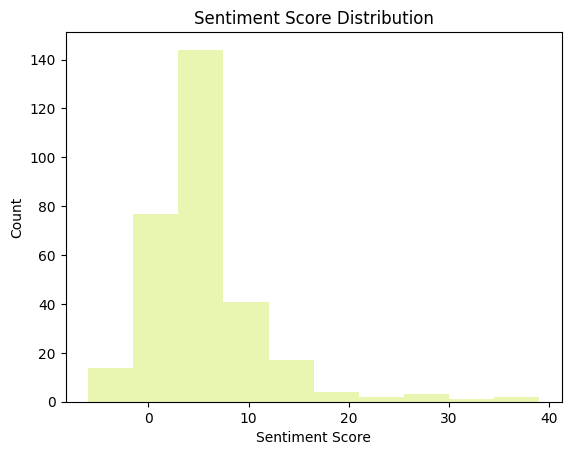

In [56]:
df['sentiment_score'].plot(kind='hist',color=pallete_color) #distribution of score among the dataset
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.title('Sentiment Score Distribution')
plt.show()

In [57]:
df.groupby(by='sentiment_score')['cleaned_headline_reviewbody'].count() #grouping the sentiment score

sentiment_score
-6.0      2
-5.0      1
-4.0      3
-3.0      3
-2.0      5
-1.0      7
 0.0     40
 1.0     10
 2.0     20
 3.0     55
 4.0     14
 5.0     20
 6.0     45
 7.0     10
 8.0     17
 9.0      7
 10.0     8
 11.0     9
 12.0     7
 13.0     3
 14.0     3
 15.0     2
 16.0     2
 17.0     1
 20.0     3
 22.0     1
 23.0     1
 27.0     2
 29.0     1
 30.0     1
 35.0     1
 39.0     1
Name: cleaned_headline_reviewbody, dtype: int64

In [58]:
#creating a new column based on sentiment score postive if score > 0 or negative
df['sentiment'] = df['sentiment_score'].apply(lambda x:'Positive' if x > 0 else 'Negative' if x<0 else 'Neutral')

In [59]:
df['sentiment'].value_counts() #value counts for positive and negative

sentiment
Positive    244
Neutral      40
Negative     21
Name: count, dtype: int64

In [60]:
df.head()

,headline,reviewBody,ratingValue,pos_or_neg,Headline_ReviewBody,cleaned_headline_reviewbody,sentiment_score,sentiment
0,Super light and efficient laptop,Super light and efficient laptop. Crisp & cle...,5.0,1,Super light and efficient laptop Super light a...,super light and effici laptop super light and ...,8.0,Positive
1,NEW laptop is great,so far I am loving the new look and the feel o...,5.0,1,NEW laptop is great so far I am loving the new...,new laptop is great so far i am love the new l...,6.0,Positive
2,Lightweight powerhouse.,Great build quality \ excellent screen \ very ...,5.0,1,Lightweight powerhouse. Great build quality \ ...,lightweight powerhous great build qualiti exce...,11.0,Positive
3,Great Laptop for Work,Excellent laptop for work. Processor was able ...,5.0,1,Great Laptop for Work Excellent laptop for wor...,great laptop for work excel laptop for work pr...,5.0,Positive
4,Practical Solid Laptop,"So far so good, I like it has an HDMI, USB-C &...",5.0,1,"Practical Solid Laptop So far so good, I like ...",practic solid laptop so far so good i like it ...,15.0,Positive


## visualizing Top Words based on Frequency of the dataset

In [61]:
#top 20 words of cleaned_headline_reviewbody based on frequency
df['cleaned_headline_reviewbody'] = df['cleaned_headline_reviewbody'].fillna('').astype(str)
# Join all strings, split them into individual words, and get the top 20 most common words
freq = pd.Series(' '.join(df['cleaned_headline_reviewbody']).split()).value_counts()[:20]
print(freq)

the       597
and       448
a         292
laptop    282
is        281
to        275
it        272
i         231
of        189
for       183
with      172
great     153
thi       123
dell      111
in        107
veri      103
work       94
use        89
good       84
that       81
Name: count, dtype: int64


In [62]:
#calculating frequencies for each word and its occurances
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(min_df=1, max_df=0.5, ngram_range=(1, 2))
x = vect.fit_transform(df['reviewBody'])
word_freq = pd.DataFrame({ 'term': vect.get_feature_names_out(),
                          'occurances': np.asarray(x.sum(axis=0)).ravel()})
word_freq['frequency'] = word_freq['occurances'] / word_freq['occurances'].sum()
word_freq

,term,occurances,frequency
0,04,1,0.000054
1,04 on,1,0.000054
2,10,11,0.000590
3,10 and,2,0.000107
4,10 aspect,1,0.000054
...,...,...,...
8725,your users,1,0.000054
8726,zero,1,0.000054
8727,zero issues,1,0.000054
8728,zoom,1,0.000054


In [63]:
#the top 20 words from the df[reviewbody] based on frequency
top_20_words = word_freq.sort_values(by='frequency', ascending=False).head(20)
top_20_words

,term,occurances,frequency
7565,to,267,0.014328
3618,is,266,0.014274
3779,it,240,0.012879
4036,laptop,179,0.009606
5015,of,171,0.009176
2680,for,159,0.008532
8465,with,154,0.008264
7444,this,117,0.006279
8076,very,95,0.005098
3020,great,93,0.004991


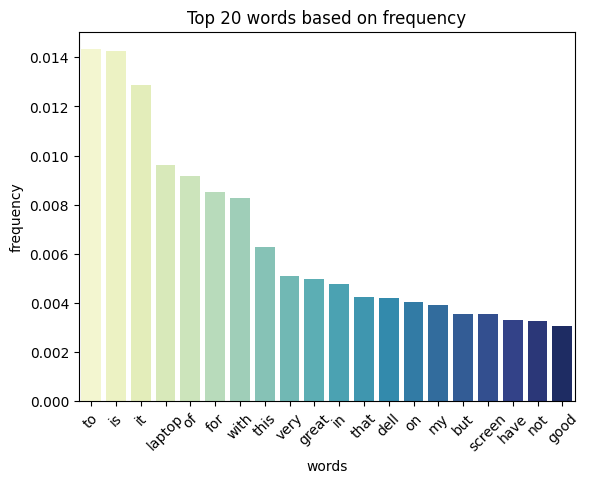

In [64]:
#bar plot for the top 20 words based on frequency
sns.barplot(x='term', y='frequency',data=top_20_words,hue='term',palette='YlGnBu')
plt.xlabel('words')
plt.ylabel('frequency')
plt.title('Top 20 words based on frequency')
plt.xticks(rotation=45)
plt.show()

# Insights from the Positive & Negative  Sentiment of the dataset

In [65]:
df_positive_sentiment = df[df['sentiment'] == 'Positive'] #creating a new dataframe with only positive scores
df_negative_sentiment = df[df['sentiment'] == 'Negative'] #creating a new dataframe with only negative scores
df_neutral_sentiment = df[df['sentiment'] == 'Neutral'] #creating a new dataframe with only neutral scores

In [66]:
print(df_positive_sentiment.shape)
print(df_negative_sentiment.shape)
print(df_neutral_sentiment.shape)

(244, 8)
(21, 8)
(40, 8)


In [67]:
df_positive_sentiment.head()

,headline,reviewBody,ratingValue,pos_or_neg,Headline_ReviewBody,cleaned_headline_reviewbody,sentiment_score,sentiment
0,Super light and efficient laptop,Super light and efficient laptop. Crisp & cle...,5.0,1,Super light and efficient laptop Super light a...,super light and effici laptop super light and ...,8.0,Positive
1,NEW laptop is great,so far I am loving the new look and the feel o...,5.0,1,NEW laptop is great so far I am loving the new...,new laptop is great so far i am love the new l...,6.0,Positive
2,Lightweight powerhouse.,Great build quality \ excellent screen \ very ...,5.0,1,Lightweight powerhouse. Great build quality \ ...,lightweight powerhous great build qualiti exce...,11.0,Positive
3,Great Laptop for Work,Excellent laptop for work. Processor was able ...,5.0,1,Great Laptop for Work Excellent laptop for wor...,great laptop for work excel laptop for work pr...,5.0,Positive
4,Practical Solid Laptop,"So far so good, I like it has an HDMI, USB-C &...",5.0,1,"Practical Solid Laptop So far so good, I like ...",practic solid laptop so far so good i like it ...,15.0,Positive


### Top 20 Words in the Positive Sentiment

In [68]:
#creating a dataframe with only positive sentiment and words based on its frequency
x = vect.fit_transform(df_positive_sentiment['reviewBody'])
word_freq = pd.DataFrame({ 'term': vect.get_feature_names_out(),
                          'occurances': np.asarray(x.sum(axis=0)).ravel()})
word_freq['frequency'] = word_freq['occurances'] / word_freq['occurances'].sum()
word_freq

,term,occurances,frequency
0,04,1,0.000061
1,04 on,1,0.000061
2,10,10,0.000615
3,10 and,2,0.000123
4,10 aspect,1,0.000061
...,...,...,...
7814,your pc,1,0.000061
7815,your shoulder,1,0.000061
7816,your users,1,0.000061
7817,zoom,1,0.000061


In [69]:
#Top 20 Words in the Positive Sentiment
top_20_positive = word_freq.sort_values(by='frequency', ascending=False).head(20)
top_20_positive

,term,occurances,frequency
3261,is,238,0.014632
6786,to,231,0.014201
3405,it,199,0.012234
3625,laptop,164,0.010082
4508,of,148,0.009099
2402,for,143,0.008791
7584,with,125,0.007685
6674,this,107,0.006578
2716,great,92,0.005656
7243,very,82,0.005041


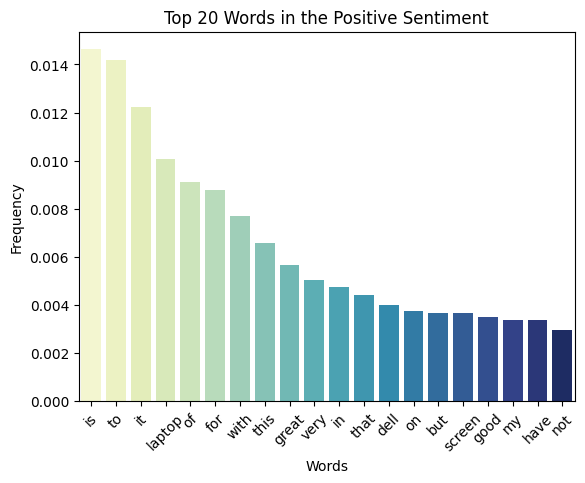

In [70]:
#barplot for the top 20 words with positive sentiment
sns.barplot(x='term', y='frequency',data=top_20_positive,hue='term',palette='YlGnBu')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Words in the Positive Sentiment')
plt.xticks(rotation=45)
plt.show()

### Top 20 Words in the Negative Sentiment

In [71]:
#creating a dataframe with only negative sentiment and its occurances and frequency
x = vect.fit_transform(df_negative_sentiment['reviewBody'])
word_freq = pd.DataFrame({'term': vect.get_feature_names_out(),
                          'occurances': np.asarray(x.sum(axis=0)).ravel()})
word_freq['frequency'] = word_freq['occurances'] / word_freq['occurances'].sum()
word_freq

,term,occurances,frequency
0,10,1,0.000875
1,10 days,1,0.000875
2,2019,2,0.001750
3,2019 dell,1,0.000875
4,2019 version,1,0.000875
...,...,...,...
848,yet,1,0.000875
849,yet ve,1,0.000875
850,you,2,0.001750
851,you get,1,0.000875


In [72]:
#top 20 negative words based on frequency
top_20_negative = word_freq.sort_values(by='frequency',ascending=False).head(20)
top_20_negative

,term,occurances,frequency
348,it,18,0.015748
716,to,17,0.014873
823,with,13,0.011374
459,of,13,0.011374
331,is,11,0.009624
472,on,10,0.008749
247,for,9,0.007874
169,dell,7,0.006124
421,my,7,0.006124
379,laptop,7,0.006124


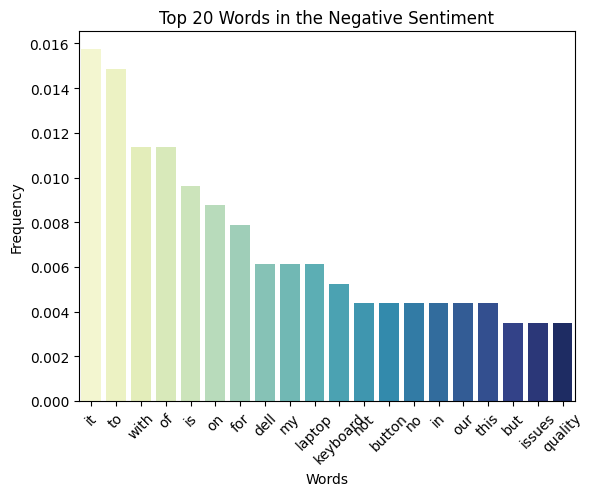

In [73]:
#barplot for the top 20 words in the negative sentiment
sns.barplot(x='term',y='frequency',data=top_20_negative,hue='term',palette='YlGnBu')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Words in the Negative Sentiment')
plt.xticks(rotation=45)
plt.show()

## Top 20 Words from the Neutral Sentiment

In [74]:
#creating a dataframe with only Neutral sentiment and words based on its frequency
x = vect.fit_transform(df_neutral_sentiment['reviewBody'])
word_freq = pd.DataFrame({ 'term': vect.get_feature_names_out(),
                          'occurances': np.asarray(x.sum(axis=0)).ravel()})
word_freq['frequency'] = word_freq['occurances'] / word_freq['occurances'].sum()
word_freq

,term,occurances,frequency
0,11p,1,0.000776
1,32gb,1,0.000776
2,32gb of,1,0.000776
3,7040,1,0.000776
4,7040 also,1,0.000776
...,...,...,...
888,yet,3,0.002327
889,yet and,1,0.000776
890,yet shipping,1,0.000776
891,zero,1,0.000776


In [75]:
#top 20 neutral words based on frequency
top_20_neutral= word_freq.sort_values(by='frequency',ascending=False).head(20)
top_20_neutral

,term,occurances,frequency
695,the,42,0.032583
358,it,23,0.017843
34,and,21,0.016292
748,to,19,0.014740
337,is,17,0.013189
862,with,16,0.012413
459,my,11,0.008534
492,of,10,0.007758
812,very,9,0.006982
484,not,8,0.006206


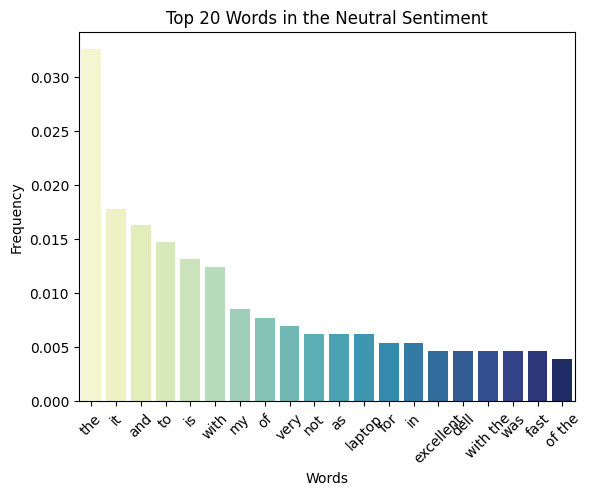

In [76]:
#barplot for the top 20 words with neutral sentiment
sns.barplot(x='term', y='frequency',data=top_20_neutral,hue='term',palette='YlGnBu')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Words in the Neutral Sentiment')
plt.xticks(rotation=45)
plt.show()

## wordCloud for the Postive and Negative Sentime




Positve Reviews WordCloud Plot

In [77]:
#importing and creating a function which plots wordcloud image
from wordcloud import WordCloud,STOPWORDS
def gen_cloud(text):
  plt.figure(figsize=(10,10))
  plt.imshow(text,interpolation='bilinear')
  plt.axis('off')
  plt.show()

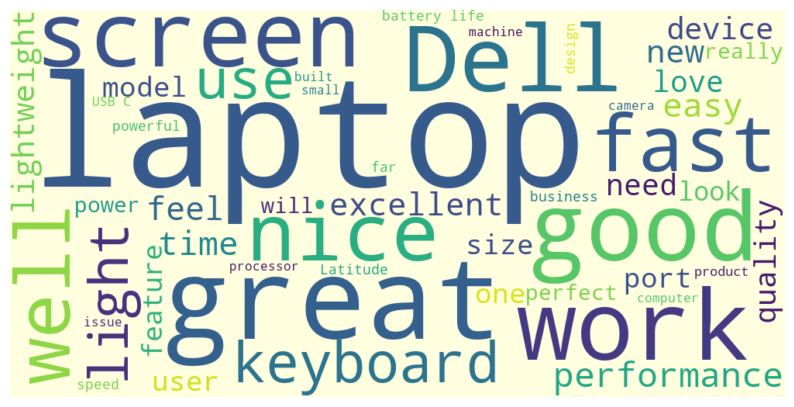

In [78]:
#wordcloud image for the positive words
text = df_positive_sentiment['reviewBody'].str.cat(sep='  ')
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='lightyellow',max_words=50,width=1000,height=500).generate(text)

gen_cloud(wordcloud)

Negative Review WordCloud Plot

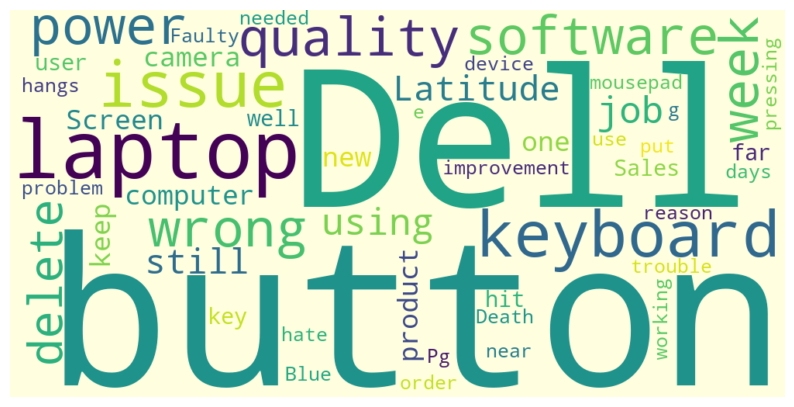

In [79]:
#wordcloud image for the negative words
text = df_negative_sentiment['reviewBody'].str.cat(sep=' ')
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='lightyellow',max_words=50,width=1000,height=500).generate(text)
gen_cloud(wordcloud)

Neutral Sentiment WordCloud Plot

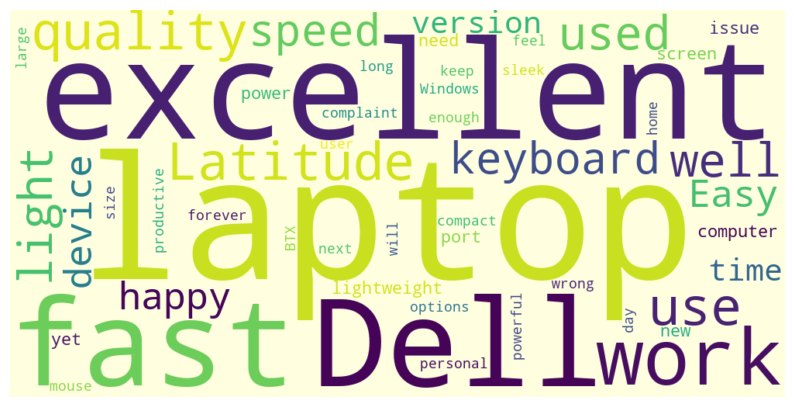

In [80]:
#wordcloud image for the negative words
text = df_neutral_sentiment['reviewBody'].str.cat(sep=' ')
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='lightyellow',max_words=50,width=1000,height=500).generate(text)
gen_cloud(wordcloud)

# Bi Gram for dataset reviewBody

In [81]:
#creating a bigram that gives top 2 words in the dataset['reviewbody']
def get_top_2_words(text,n=None):
  vect = CountVectorizer(ngram_range=(2,2),max_features=2000).fit(text) #(2,2) for the bigram , (3,3) for the trigram
  bag_of_words = vect.transform(text)
  sum_of_words = bag_of_words.sum(axis=0)
  words_freq = [(word, sum_of_words[0, idx]) for word, idx in vect.vocabulary_.items()]
  words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
  return words_freq

In [82]:
top_2_words = get_top_2_words(df['reviewBody'],n=200)
top_2_df = pd.DataFrame(top_2_words,columns=['bi_gram','frequency'])
top_2_df = top_2_df[:20]
print(top_2_df.shape)
top_2_df.head()

(20, 2)


,bi_gram,frequency
0,of the,46
1,with the,42
2,the laptop,40
3,this laptop,37
4,it is,35


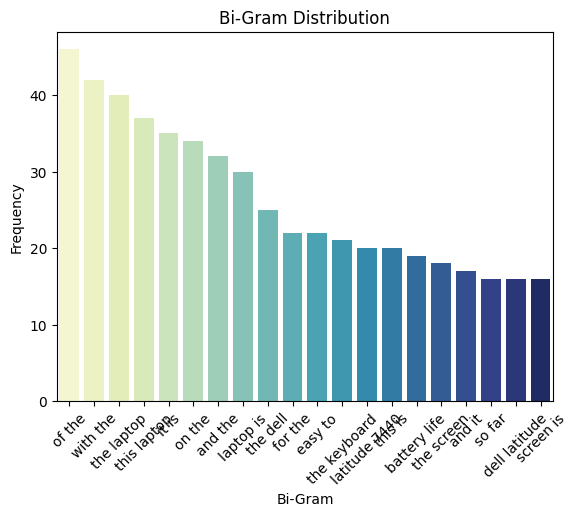

In [83]:
#bi-gram plot
sns.barplot(x='bi_gram',y='frequency',data=top_2_df,hue='bi_gram',palette='YlGnBu')
plt.xlabel('Bi-Gram')
plt.ylabel('Frequency')
plt.title('Bi-Gram Distribution')
plt.xticks(rotation=45)
plt.show()

## Tri gram for the dataset with 3 top words

In [84]:
#creating a function for the trigram
def get_top3_words(text,n=None):
  x = CountVectorizer(ngram_range=(3,3),max_features=2000).fit(text)
  bag_of_words = x.transform(text)
  sum_of_words = bag_of_words.sum(axis=0)
  words_freq = [(word, sum_of_words[0, idx]) for word,idx in x.vocabulary_.items()]
  words_freq = sorted(words_freq,key=lambda x: x[1] , reverse=True)
  return words_freq

In [85]:
#creating a dataframe form the function
top_3_words = get_top3_words(df['reviewBody'],n=200)
top_3_df = pd.DataFrame(top_3_words,columns=['tri_gram','frequency'])
top_3_df = top_3_df[:20]
print(top_3_df.shape)
top_3_df.head()

(20, 2)


,tri_gram,frequency
0,this laptop is,16
1,the dell latitude,14
2,of the laptop,9
3,to carry around,9
4,dell latitude 7440,9


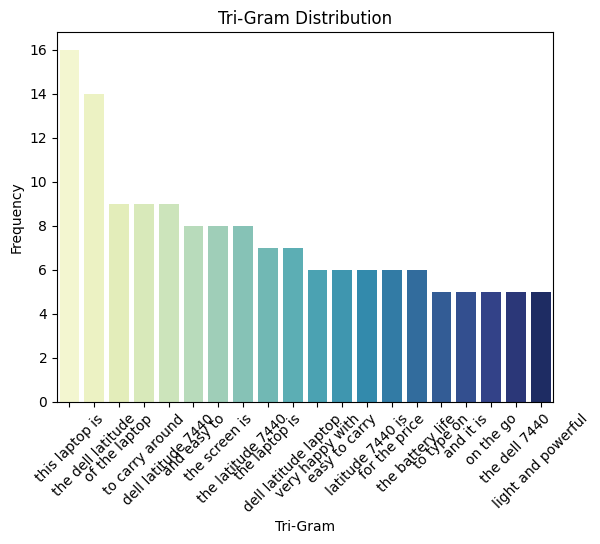

In [86]:
#tri_gram plot for the dataframe top_3_df
sns.barplot(x='tri_gram',y='frequency',data=top_3_df,hue='tri_gram',palette='YlGnBu')
plt.title('Tri-Gram Distribution')
plt.xlabel('Tri-Gram')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [87]:
df.head()

,headline,reviewBody,ratingValue,pos_or_neg,Headline_ReviewBody,cleaned_headline_reviewbody,sentiment_score,sentiment
0,Super light and efficient laptop,Super light and efficient laptop. Crisp & cle...,5.0,1,Super light and efficient laptop Super light a...,super light and effici laptop super light and ...,8.0,Positive
1,NEW laptop is great,so far I am loving the new look and the feel o...,5.0,1,NEW laptop is great so far I am loving the new...,new laptop is great so far i am love the new l...,6.0,Positive
2,Lightweight powerhouse.,Great build quality \ excellent screen \ very ...,5.0,1,Lightweight powerhouse. Great build quality \ ...,lightweight powerhous great build qualiti exce...,11.0,Positive
3,Great Laptop for Work,Excellent laptop for work. Processor was able ...,5.0,1,Great Laptop for Work Excellent laptop for wor...,great laptop for work excel laptop for work pr...,5.0,Positive
4,Practical Solid Laptop,"So far so good, I like it has an HDMI, USB-C &...",5.0,1,"Practical Solid Laptop So far so good, I like ...",practic solid laptop so far so good i like it ...,15.0,Positive


In [88]:
#creating a new column for target as 2 == 'Positive' , 1 == 'Neutral and 0 == 'Negative'
df['sentiment_new'] = df['sentiment'].apply(lambda x: 2 if x == 'Positive' else 1 if x == 'Neutral' else 0)
df['sentiment_new'].value_counts()

sentiment_new
2    244
1     40
0     21
Name: count, dtype: int64

# Model Building


In [89]:
target = df['sentiment_new']
features = df['cleaned_headline_reviewbody']

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [91]:
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.3,random_state=42)

In [92]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(213,)
(92,)
(213,)
(92,)


In [93]:
tfidf = TfidfVectorizer()
x_train_tfidf = tfidf.fit_transform(x_train)

In [94]:
print(x_train_tfidf.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [123]:
x_test_tfidf = tfidf.fit_transform(x_test)
print(x_test_tfidf.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### MultinomialNB

In [118]:
from sklearn.naive_bayes import MultinomialNB
naivebayes = MultinomialNB(alpha=1.0)
naivebayes.fit(x_train_tfidf,y_train)

MultinomialNB()

In [119]:
ypred = naivebayes.predict(x_test_tfidf)

In [120]:
print('The Accuracy Score of MultinomialNB is =',((accuracy_score(y_test,ypred))*100),'%')

The Accuracy Score of MultinomialNB is = 79.34782608695652 %


In [121]:
print('training score :',accuracy_score(y_train,naivebayes.predict(x_train_tfidf)))
print('testing score :',accuracy_score(y_test,naivebayes.predict(x_test_tfidf)))

training score : 0.8028169014084507
testing score : 0.7934782608695652


In [113]:
#hyper parameter tuning
from sklearn.model_selection import GridSearchCV

In [114]:
params = {'alpha':[1,2,3,4,5,6,7,8,9,10]}

In [115]:
GridSearch = GridSearchCV(naivebayes,params,cv=5)

In [116]:
GridSearch.fit(x_train_tfidf,y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(alpha=3.0),
             param_grid={'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [117]:
GridSearch.best_params_

{'alpha': 1}

In [162]:
text = [' hello i am a good boy, i am a good boy']
cv = CountVectorizer(stop_words='english')
text_cv = cv.fit_transform(text)
text_cvnew = text_cv.toarray()
print(text_cvnew)


[[2 2 1]]


In [168]:
tfidf = TfidfVectorizer(analyzer=clean_text)
text_1 = tfidf.transform(text)
text_1new = text_1.toarray()
print(text_1new)

NotFittedError: The TF-IDF vectorizer is not fitted

In [165]:
naive = naivebayes.fit(x_train_tfidf,y_train)

In [169]:
naive.predict()

ValueError: Expected 2D array, got 1D array instead:
array=['helo'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

### LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(x_train_tfidf,y_train)

In [ ]:
ypred = logistic.predict(x_test_tfidf)
print('The Accuracy Score of Logistic Regression is =',((accuracy_score(y_test,ypred))*100).round(2),'%')

In [ ]:
print('training score :',accuracy_score(y_train,logistic.predict(x_train_tfidf)))
print('testing score :',accuracy_score(y_test,logistic.predict(x_test_tfidf)))

### RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier(max_depth=1,criterion='gini')
randomforest.fit(x_train_tfidf,y_train)

In [ ]:
ypred = randomforest.predict(x_test_tfidf)
print('The Accuracy Score of Random Forest is =',((accuracy_score(y_test,ypred))*100).round(2),'%')

In [ ]:
print('training score :',accuracy_score(y_train,randomforest.predict(x_train_tfidf)))
print('testing score :',accuracy_score(y_test,randomforest.predict(x_test_tfidf)))

In [ ]:
#hyperparamter tuning with Gridsearch
params = {'max_depth':[1,2,3,4,5,6,7,8,9,10],'criterion':['gini','entropy']}

In [ ]:
GridSearch = GridSearchCV(randomforest,params,cv=5)

In [ ]:
GridSearch.fit(x_train_tfidf,y_train)

In [ ]:
GridSearch.best_params_

### SVC

In [ ]:
from sklearn.svm import SVC
svc = SVC(C=2,kernel='linear',degree=1,gamma='scale')
svc.fit(x_train_tfidf,y_train)

In [ ]:
ypred = svc.predict(x_test_tfidf)
accuracy_score(y_test,ypred)
print('The Accuracy Score of SVC is =',((accuracy_score(y_test,ypred))*100).round(2),'%')

In [ ]:
print('training score :',accuracy_score(y_train,svc.predict(x_train_tfidf)))
print('testing score :',accuracy_score(y_test,svc.predict(x_test_tfidf)))

In [ ]:
#hyperparamter tuning with GridsearchCV
params = {'C':[1,2,3,4,5,6,7,8,9,10],'kernel':['linear','poly','rbf','sigmoid'],'degree':[1,2,3,4,5],'gamma':['scale','auto']}

In [ ]:
gridsearch = GridSearchCV(svc,params,cv=5)

In [ ]:
gridsearch.fit(x_train_tfidf,y_train)

In [ ]:
gridsearch.best_params_

In [ ]:
confusion_matrix(y_test,ypred)

In [ ]:
sns.heatmap(confusion_matrix(y_test,ypred),annot=True,cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_test,ypred))

### Using SMOTE(synthetic Minority Oversampling Technique) , because we have Imbalanced classification of Data

In [ ]:
target.value_counts()

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
counter = Counter(y_train)
print('Before Sampling',counter)
smote = SMOTE()
x_train_tfidf_smote,y_train_smote = smote.fit_resample(x_train_tfidf,y_train)
counter = Counter(y_train_smote)
print('After Sampling',counter)

In [ ]:
y_train_smote.value_counts().plot(kind='bar',color=pallete_color)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()


## Model building after SMOTE Technique


MultinomialNB

In [ ]:
naivebayes.fit(x_train_tfidf_smote,y_train_smote)

In [ ]:
yprednew = naivebayes.predict(x_test_tfidf)
print('The Accuracy Score of MultinomialNB after using SMOTE is =',((accuracy_score(y_test,yprednew))*100).round(2),'%')

In [ ]:
print('training score :',accuracy_score(y_train_smote,naivebayes.predict(x_train_tfidf_smote)))
print('testing score :',accuracy_score(y_test,naivebayes.predict(x_test_tfidf)))

Random Forest

In [ ]:
randomforest1 = RandomForestClassifier(max_depth=2,criterion='gini')
randomforest1.fit(x_train_tfidf_smote,y_train_smote)
yprednew = randomforest1.predict(x_test_tfidf)
print('The Accuracy Score of Random Forest after using SMOTE is =',((accuracy_score(y_test,yprednew))*100).round(2),'%')

In [ ]:
print('training score :',accuracy_score(y_train_smote,randomforest1.predict(x_train_tfidf_smote)))
print('testing score :',accuracy_score(y_test,randomforest1.predict(x_test_tfidf)))

Logistic Regression

In [ ]:
logistic.fit(x_train_tfidf_smote,y_train_smote)
yprednew = logistic.predict(x_test_tfidf)
print('The Accuracy Score of Logistic Regression after using SMOTE is =',((accuracy_score(y_test,yprednew))*100).round(2),'%')

In [ ]:
print('training score :',accuracy_score(y_train_smote,logistic.predict(x_train_tfidf_smote)))
print('testing score :',accuracy_score(y_test,logistic.predict(x_test_tfidf)))

Support Vector Machine Classifier

In [ ]:
svc = SVC(C=1,kernel='rbf',degree=3,gamma='scale')
svc.fit(x_train_tfidf_smote,y_train_smote)
yprednew = svc.predict(x_test_tfidf)
print('The Accuracy Score of SVC after using SMOTE is =',((accuracy_score(y_test,yprednew))*100).round(2),'%')

In [ ]:
print('training score :',accuracy_score(y_train_smote,svc.predict(x_train_tfidf_smote)))
print('testing score :',accuracy_score(y_test,svc.predict(x_test_tfidf)))

XGBoost Classifier

In [ ]:
import xgboost
xgb = xgboost.XGBClassifier()
xgb.fit(x_train_tfidf_smote,y_train_smote)
yprednew = xgb.predict(x_test_tfidf)
print('The Accuracy Score of XGBoost Classifier after using SMOTE is =',((accuracy_score(y_test,yprednew))*100).round(2),'%')

In [ ]:
print('training score :',accuracy_score(y_train_smote,xgb.predict(x_train_tfidf_smote)))
print('testing score :',accuracy_score(y_test,xgb.predict(x_test_tfidf)))

In [ ]:
confusion_matrix(y_test,yprednew)

In [ ]:
sns.heatmap(confusion_matrix(y_test,yprednew),annot=True,cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.axis('off')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_test,yprednew))

### Deployment

In [ ]:
#importing picle to dump my model
import pickle

In [ ]:
file = 'random_forest_model.pkl'

In [ ]:
pickle.dump(randomforest,open(file,'wb'))

In [201]:
from sklearn.pipeline import Pipeline
target = df['sentiment']
features = df['Headline_ReviewBody']

In [209]:
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.2,random_state=42)

In [210]:
pipelinemodel = Pipeline([('tfidf',TfidfVectorizer(analyzer=clean_text)),('model',MultinomialNB())])

In [211]:
pipelinemodel.fit(x_train,y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(analyzer=<function clean_text at 0x000001C2C3B5EEF0>)),
                ('model', MultinomialNB())])

In [212]:
ypred = pipelinemodel.predict(x_test)

In [213]:
accuracy_score(y_test,ypred)

0.7540983606557377

In [214]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         7
     Neutral       0.00      0.00      0.00         8
    Positive       0.75      1.00      0.86        46

    accuracy                           0.75        61
   macro avg       0.25      0.33      0.29        61
weighted avg       0.57      0.75      0.65        61



In [219]:
pipelinemodel.predict([''])

array(['Positive'], dtype='<U8')

In [191]:
df

,headline,reviewBody,ratingValue,pos_or_neg,Headline_ReviewBody,cleaned_headline_reviewbody,sentiment_score,sentiment,sentiment_new
0,Super light and efficient laptop,Super light and efficient laptop. Crisp & cle...,5.0,1,Super light and efficient laptop Super light a...,super light and effici laptop super light and ...,8.0,Positive,2
1,NEW laptop is great,so far I am loving the new look and the feel o...,5.0,1,NEW laptop is great so far I am loving the new...,new laptop is great so far i am love the new l...,6.0,Positive,2
2,Lightweight powerhouse.,Great build quality \ excellent screen \ very ...,5.0,1,Lightweight powerhouse. Great build quality \ ...,lightweight powerhous great build qualiti exce...,11.0,Positive,2
3,Great Laptop for Work,Excellent laptop for work. Processor was able ...,5.0,1,Great Laptop for Work Excellent laptop for wor...,great laptop for work excel laptop for work pr...,5.0,Positive,2
4,Practical Solid Laptop,"So far so good, I like it has an HDMI, USB-C &...",5.0,1,"Practical Solid Laptop So far so good, I like ...",practic solid laptop so far so good i like it ...,15.0,Positive,2
...,...,...,...,...,...,...,...,...,...
300,Faulty motherboard,Dell sent me a laptop with a faulty motherboard,1.0,0,Faulty motherboard Dell sent me a laptop with ...,faulti motherboard dell sent me a laptop with ...,0.0,Neutral,1
301,Dead on arrival,"Laptop dead on arrival, still waiting on a rep...",1.0,0,"Dead on arrival Laptop dead on arrival, still ...",dead on arriv laptop dead on arriv still wait ...,-6.0,Negative,0
302,Bad Quality,"Bad Quality, overheating, and keyboard/trackpa...",1.0,0,"Bad Quality Bad Quality, overheating, and keyb...",bad qualiti bad qualiti overh and keyboard tra...,-6.0,Negative,0
303,Hassles with installation of Win 11,Laptop did not come with the required security...,1.0,0,Hassles with installation of Win 11 Laptop did...,hassl with instal of win laptop did not come w...,4.0,Positive,2
